# Łączenie procesów Poissona

Mając 2 niezależne niejednorodne procesy Poissona stwórz proces składający się z połączenia wszystkich zdarzeń obu.

Sprawdź, że jego intensywność jest sumą 2 oryginalnych intensywności.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import typing

In [2]:
def thinning(lam_t: typing.Callable, lam: int, T: int) -> [int, np.array]:
    """Funkcja generująca niejednorodny proces Poissona metodą rozrzedzania.
    Input:
        lam_t (function) - funkcja intensywności,
        lam (int) - stała intensywności,
        T (int) - kompozyt czasowy.
    Output:
        I (int) - liczba skoków N(t) na [0, T],
        S (np.array) -  momenty skoków."""
    t = 0
    I = 0
    S = [0]
    while t <= T:
        t -= np.log(np.random.uniform(0, 1)) / lam
        U2 = np.random.uniform(0, 1)
        if U2 <= lam_t(t) / lam:
            I += 1
            S = np.append(S, t)
    return I, S


def lam_t1(t: int) -> int:
    """Funkcja intensywności dla niejednorodnego procesu Poissona zwracająca λ(t)=t/2."""
    return t / 2


def lam_t2(t: int) -> int:
    """Funkcja intensywności dla niejednorodnego procesu Poissona zwracająca λ(t)=t."""
    return t

In [3]:
T = 10
skoki1 = thinning(lam_t=lam_t1, lam=lam_t1(T), T=T)[1]
skoki2 = thinning(lam_t=lam_t2, lam=lam_t2(T), T=T)[1]
polaczenie = sorted(np.concatenate((skoki1, skoki2)))

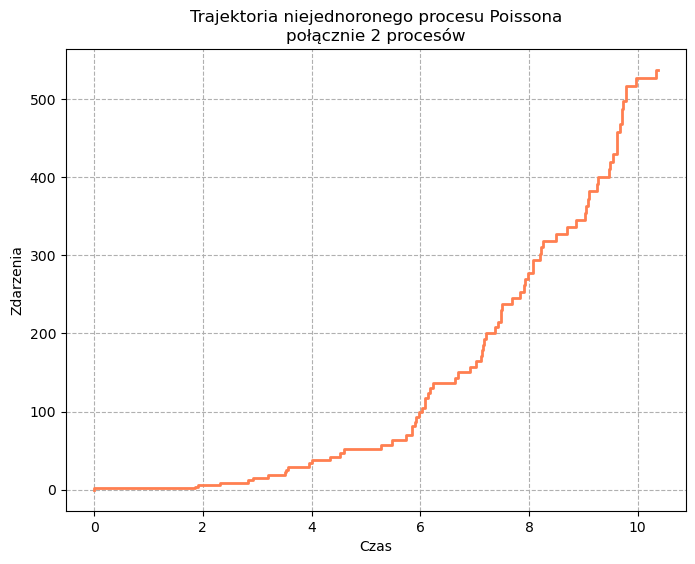

In [4]:
plt.figure(figsize=(8, 6))
plt.step(polaczenie, np.cumsum(polaczenie), color="coral", lw=2)
plt.xlabel("Czas")
plt.ylabel("Zdarzenia")
plt.title("Trajektoria niejednoronego procesu Poissona\npołącznie 2 procesów")
plt.grid(linestyle="--")
plt.show()

**Intensywność procesu Poissona w danym przedziale czasu to średnia liczba zdarzeń na jednostkę czasu w tym przedziale**.

Poniżej sprawdzamy, czy intensywność procesu połączonego jest sumą 2 oryginalnych intensywności.

In [5]:
expected1 = np.zeros(100)
expected2 = np.zeros(100)
expected3 = np.zeros(100)
points1 = np.zeros(100)
points2 = np.zeros(100)
points3 = np.zeros(100)

for i in range(100):

    for j in range(100):
        N1 = thinning(lam_t=lam_t1, lam=lam_t1(T), T=T)[0]
        N2 = thinning(lam_t=lam_t2, lam=lam_t2(T), T=T)[0]
        points1[j] = N1
        points2[j] = N2
        points3[j] = N1 + N2

    expected1[i] = np.mean(points1)
    expected2[i] = np.mean(points2)
    expected3[i] = np.mean(points3)


print(
    "Intensywność 1. procesu to ",
    np.mean(expected1),
    "\nIntensywność 2. procesu to ",
    np.mean(expected2),
    "\nIntensywność 3. procesu to ",
    np.mean(expected3),
)

Intensywność 1. procesu to  26.060600000000004 
Intensywność 2. procesu to  51.10059999999999 
Intensywność 3. procesu to  77.1612
